# flush_memory

In [ ]:
import torch
def flush_memory():
    import gc
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()
    with torch.no_grad():
        for _ in range(2):
          torch.cuda.empty_cache()
          torch.cuda.ipc_collect()

flush_memory()
torch.cuda.memory_summary(device='cuda', abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [ ]:
!pip install scikit-video -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.1 MB/s eta 0:00:00


In [ ]:
import skvideo.io
import cv2
import os
import numpy as np
np.float = np.float64
np.int = np.int_

import pandas as pd
from google.colab.patches import cv2_imshow
import PIL
from IPython import display

In [ ]:
MAIN_DIR = "/ your main dir"

DIR_TO = MAIN_DIR + f"/MSR_VIT_movi"

hand_selected = DIR_TO + "/crop_hand_selected_mp4"
video_list = os.listdir(hand_selected)
video_list.sort()
video_list

['video7212.mp4',
 'video7213.mp4',
 'video7227.mp4',
 'video7361.mp4',
 'video7478.mp4',
 'video7570.mp4',
 'video7680.mp4',
 'video7698.mp4',
 'video7699.mp4',
 'video7751.mp4',
 'video7917.mp4',
 'video8089.mp4',
 'video8426.mp4',
 'video8443.mp4',
 'video8483.mp4',
 'video8664.mp4',
 'video8668.mp4',
 'video8676.mp4',
 'video8826.mp4',
 'video9036.mp4',
 'video9131.mp4',
 'video9229.mp4',
 'video9256.mp4',
 'video9305.mp4',
 'video9348.mp4',
 'video9356.mp4',
 'video9512.mp4',
 'video9683.mp4',
 'video9742.mp4',
 'video9797.mp4',
 'video9807.mp4']

Number of frames: 16
Number of rows: 512
Number of cols: 512
Number of channels: 3


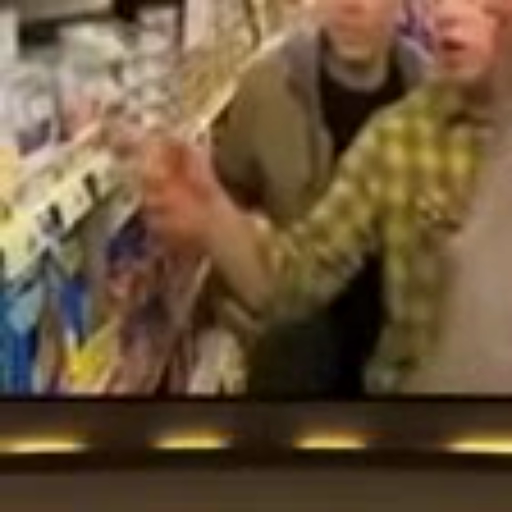

In [ ]:
FILM_ID = 7 #28#22

# upscale frame from the bigbuckbunny sequence by a factor of 2
VIDEO_WIDTH = 512 #1024
VIDEO_HEIGHT = 512 #512
vid = skvideo.io.vread(hand_selected  + "/" + video_list[FILM_ID],
                       outputdict={
                           "-sws_flags": "bilinear",
                           "-s": f"{VIDEO_WIDTH}x{VIDEO_HEIGHT}"
                       }
)
T, M, N, C = vid.shape

print("Number of frames: %d" % (T,))
print("Number of rows: %d" % (M,))
print("Number of cols: %d" % (N,))
print("Number of channels: %d" % (C,))

id_frame_1 = 10
frame_1 =   vid[id_frame_1]
cv2_imshow(frame_1[...,::-1])

# Uniform model

In [ ]:
!pip install uform -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.2/382.2 kB 6.3 MB/s eta 0:00:00


## Caption models

In [ ]:
from uform.gen_model import VLMForCausalLM, VLMProcessor

capt_processor = VLMProcessor.from_pretrained("unum-cloud/uform-gen")
capt_model = VLMForCausalLM.from_pretrained("unum-cloud/uform-gen")
capt_model.to('cuda')
flush_memory()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors.index.json:   0%|          | 0.00/40.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/974M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

VLMForCausalLM(
  (text_decoder): LlamaForCausalLM(
    (model): LlamaModel(
      (embed_tokens): Embedding(32003, 2048, padding_idx=0)
      (layers): ModuleList(
        (0-23): 24 x LlamaDecoderLayer(
          (self_attn): LlamaSdpaAttention(
            (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (k_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (v_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
            (rotary_emb): LlamaRotaryEmbedding()
          )
          (mlp): LlamaMLP(
            (gate_proj): Linear(in_features=2048, out_features=5504, bias=False)
            (up_proj): Linear(in_features=2048, out_features=5504, bias=False)
            (down_proj): Linear(in_features=5504, out_features=2048, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): LlamaRMSNorm()
          (post_attention_

In [ ]:
def caption_image(pil_images,
                  query_prompt,
                  processor,
                  model,
                  max_new_tokens = 100):

  inputs = processor(texts=[query_prompt],
                     images=pil_images, #[pil_image],
                     return_tensors="pt")

  with torch.inference_mode():
      output = model.generate(
          **inputs.to(model.device),
          do_sample=True,
          use_cache=True,
          temperature=0.01,
          min_new_tokens = 10,
          max_new_tokens=max_new_tokens,
          eos_token_id=32001,
          pad_token_id=processor.tokenizer.pad_token_id
      ).cpu()

  prompt_len = inputs["input_ids"].shape[1]
  caption = processor.batch_decode(output[:, prompt_len:])[0].replace('<|im_end|>', '')

  out_capting = ""
  make = True
  while make:
    for fraza in caption.split(","):

      if len(out_capting+fraza) > max_new_tokens: break
      else: out_capting+=fraza

    if len(out_capting) > max_new_tokens//3: make = False
    else: max_new_tokens*=2

  return out_capting

In [ ]:
question =  'Summarize the visual content of the image' #'Describe the image and color details.' #
start_img = PIL.Image.fromarray(vid[0])
end_img = PIL.Image.fromarray(vid[-1])

In [ ]:
caption_uniform = caption_image(pil_images = [start_img, end_img],
                                query_prompt = question,
                                processor = capt_processor,
                                model = capt_model,
                                max_new_tokens = 100)

caption_uniform

'A person sits in a chair in front of a large screen displaying a presentation'

#DF

In [ ]:
hand_df = pd.read_csv(DIR_TO + f'/MSRVTT_31_hand_selected.csv')
hand_df

,key,vid_key,video_id,sentence
0,ret524,msr9229,video9229,guys trying out ice cream
1,ret627,msr7212,video7212,a man and a woman are walking a dog on a beach
2,ret398,msr7917,video7917,shania twain does a closeup for her video
3,ret656,msr7361,video7361,a woman with a camel
4,ret53,msr8826,video8826,lady speaking on her show
5,ret671,msr8676,video8676,a girl walking down a path
6,ret90,msr9348,video9348,women walking on the stage with different styl...
7,ret373,msr8483,video8483,someone is mixing ingredients in a bowl
8,ret347,msr9512,video9512,a woman with blonde hair and a black shirt is ...
9,ret559,msr9036,video9036,young children in red fire chief hats are guid...


In [ ]:
question =  'Describe the image and color details.' # 'Summarize the visual content of the image' #

# upscale frame from the bigbuckbunny sequence by a factor of 2
VIDEO_WIDTH = 512 #1024
VIDEO_HEIGHT = 512 #512

for file_name  in video_list:

    vid = skvideo.io.vread(hand_selected  + "/" + file_name,
                          outputdict={
                              "-sws_flags": "bilinear",
                              "-s": f"{VIDEO_WIDTH}x{VIDEO_HEIGHT}"
                          }
    )

    start_img = PIL.Image.fromarray(vid[0])
    end_img = PIL.Image.fromarray(vid[-1])

    caption_uniform = caption_image(pil_images = [start_img, end_img],
                                query_prompt = question,
                                processor = capt_processor,
                                model = capt_model,
                                max_new_tokens = 100)
    print(f"{file_name} add: {caption_uniform}" )
    mask = hand_df["video_id"] == file_name.split(".")[0]
    hand_df.loc[mask, "caption_uniform"] = caption_uniform

hand_df

video7212.mp4 add: A man and a woman stand side by side
video7213.mp4 add: The image displays a box of pizza featuring a variety of toppings such as pepperoni sausage
video7227.mp4 add: The image showcases a close-up of a person's face
video7361.mp4 add: A woman stands beside a camelA woman stands beside a camel both gazing at the camera. The woman dons a pink shirt and a blue and white dress
video7478.mp4 add: A football player in a red jersey and white pants runs across a field
video7570.mp4 add: A baby with a red nose and a pink tongue is the focus of the image
video7680.mp4 add: A man with a beard and mustache dressed in a white shirt gazes directly at the camera
video7698.mp4 add: A man stands in a grocery store holding a cell phone to his ear
video7699.mp4 add: A person is shown in a white room holding a blue object
video7751.mp4 add: A chocolate cake with chocolate frosting is displayed on a white plate
video7917.mp4 add: The image showcases a blue sky with a few clouds disperse

,key,vid_key,video_id,sentence,caption_uniform
0,ret524,msr9229,video9229,guys trying out ice cream,A man holds a chocolate-covered cookie in his ...
1,ret627,msr7212,video7212,a man and a woman are walking a dog on a beach,A man and a woman stand side by side
2,ret398,msr7917,video7917,shania twain does a closeup for her video,The image showcases a blue sky with a few clou...
3,ret656,msr7361,video7361,a woman with a camel,A woman stands beside a camelA woman stands be...
4,ret53,msr8826,video8826,lady speaking on her show,A woman in a blue jacket and white shirt stand...
5,ret671,msr8676,video8676,a girl walking down a path,A young girl stands in a grassy field holding ...
6,ret90,msr9348,video9348,women walking on the stage with different styl...,A woman with long hair dressed in a black shir...
7,ret373,msr8483,video8483,someone is mixing ingredients in a bowl,The image showcases a close-up of a red round ...
8,ret347,msr9512,video9512,a woman with blonde hair and a black shirt is ...,A blonde woman with a ponytail wearing a black...
9,ret559,msr9036,video9036,young children in red fire chief hats are guid...,A group of people stand around a large red truck


In [ ]:
hand_df.to_csv(DIR_TO + f'/MSRVTT_{len(video_list)}_hand_selected_caption_uniform.csv', index=False)

In [ ]:
hand_df = pd.read_csv(DIR_TO + f'/MSRVTT_31_hand_selected_caption_uniform.csv')
hand_df

,key,vid_key,video_id,sentence,caption_uniform
0,ret524,msr9229,video9229,guys trying out ice cream,A man holds a chocolate-covered cookie in his ...
1,ret627,msr7212,video7212,a man and a woman are walking a dog on a beach,A man and a woman stand side by side
2,ret398,msr7917,video7917,shania twain does a closeup for her video,The image showcases a blue sky with a few clou...
3,ret656,msr7361,video7361,a woman with a camel,A woman stands beside a camelA woman stands be...
4,ret53,msr8826,video8826,lady speaking on her show,A woman in a blue jacket and white shirt stand...
5,ret671,msr8676,video8676,a girl walking down a path,A young girl stands in a grassy field holding ...
6,ret90,msr9348,video9348,women walking on the stage with different styl...,A woman with long hair dressed in a black shir...
7,ret373,msr8483,video8483,someone is mixing ingredients in a bowl,The image showcases a close-up of a red round ...
8,ret347,msr9512,video9512,a woman with blonde hair and a black shirt is ...,A blonde woman with a ponytail wearing a black...
9,ret559,msr9036,video9036,young children in red fire chief hats are guid...,A group of people stand around a large red truck
